## 2. Load data

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [12]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [13]:
path = '/gdrive/MyDrive/Nhóm 1/2 Bài tập trên lớp/Bài tập thực hành 1/Translated_Data/course_translated.json'

course_df = pl.read_json(path)
course_df = course_df.to_pandas()
course_df.head()

,id,name,field,prerequisites,about,resource
0,C_584313,"introduction to ""zi zhi tong jian""","['history', 'chinese language and literature']",,"through the teacher's guidance, students can g...","[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,calculus - limit theory and functions of one v...,"['applied economics', 'mathematics', 'physics'...",,this course is a basic mathematics course in s...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,photojournalism,"['art', 'journalism']",,"master basic photography skills, understand ho...","[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,data mining: theory and algorithms,['computer science and technology'],,the most interesting theory + the most useful ...,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,university computer,[],,university computer courses will be guided by ...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."


## 3. Khám phá dữ liệu

In [14]:
course_df.shape

(3781, 6)

Sử dụng hàm `info()` để cung cấp một bản tóm tắt ngắn gọn của DataFrame (tên cột, kiểu dữ liệu, số lượng giá trị không bị thiếu)

In [15]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3781 non-null   object
 1   name           3781 non-null   object
 2   field          3781 non-null   object
 3   prerequisites  3779 non-null   object
 4   about          3781 non-null   object
 5   resource       3781 non-null   object
dtypes: object(6)
memory usage: 177.4+ KB


- File course.json có 3781 hàng, Trong đó chỉ có 1 cột chứa 2 bộ giá trị NULL là cột prerequisites, còn lại các cột khác các bộ đều không chứa giá trị NULL.


### Xử lý dữ liệu Null

In [ ]:
course_df.isnull().sum()

,0
id,0
name,0
field,0
prerequisites,2
about,0
resource,0


- **Thực** hành điền các giá trị NULL bằng giá trị ‘’


In [ ]:
course_df.fillna('', inplace=True)

### Khảo sát cột field

In [ ]:
course_df['field']

,field
0,"['history', 'chinese language and literature']"
1,"['applied economics', 'mathematics', 'physics'..."
2,"['art', 'journalism']"
3,['computer science and technology']
4,[]
...,...
3776,[]
3777,[]
3778,[]
3779,[]


In [ ]:
course_df['field'].dtype

dtype('O')

In [ ]:
(course_df['field'].astype(str) == '[]').sum()

3234

- Nhận xét: Có vẻ như đây là một trường không bắt buộc nên dữ liệu bị thiếu rất nhiều.


### Cột prerequisites

In [ ]:
(course_df['prerequisites'].astype(str) == '').sum()

2580

Cột prerequisites cũng có kết quả tương tự tuy nhiên xét về mặt ý nghĩa thì đây cũng là điều bình thường

###Thống kê số lượng tài liệu

In [ ]:
def count_element(x):
    return len(x)

course_df['number of resources'] = course_df['resource'].apply(count_element)
course_df[['id', 'name', 'number of resources']]


,id,name,number of resources
0,C_584313,"introduction to ""zi zhi tong jian""",91
1,C_584329,calculus - limit theory and functions of one v...,170
2,C_584381,photojournalism,127
3,C_597208,data mining: theory and algorithms,125
4,C_597225,university computer,165
...,...,...,...
3776,C_2338076,(wind project) software engineering,103
3777,C_2341259,(wind project) object-oriented programming (c++),76
3778,C_2337996,(wind project) data structure (part 2),324
3779,C_1945689,machine learning bootcamp,76


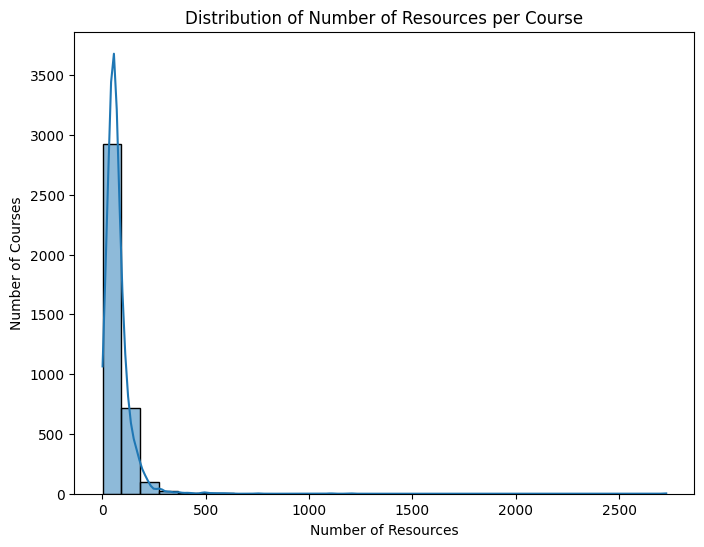

Average number of resources per course: 71.68553292779688


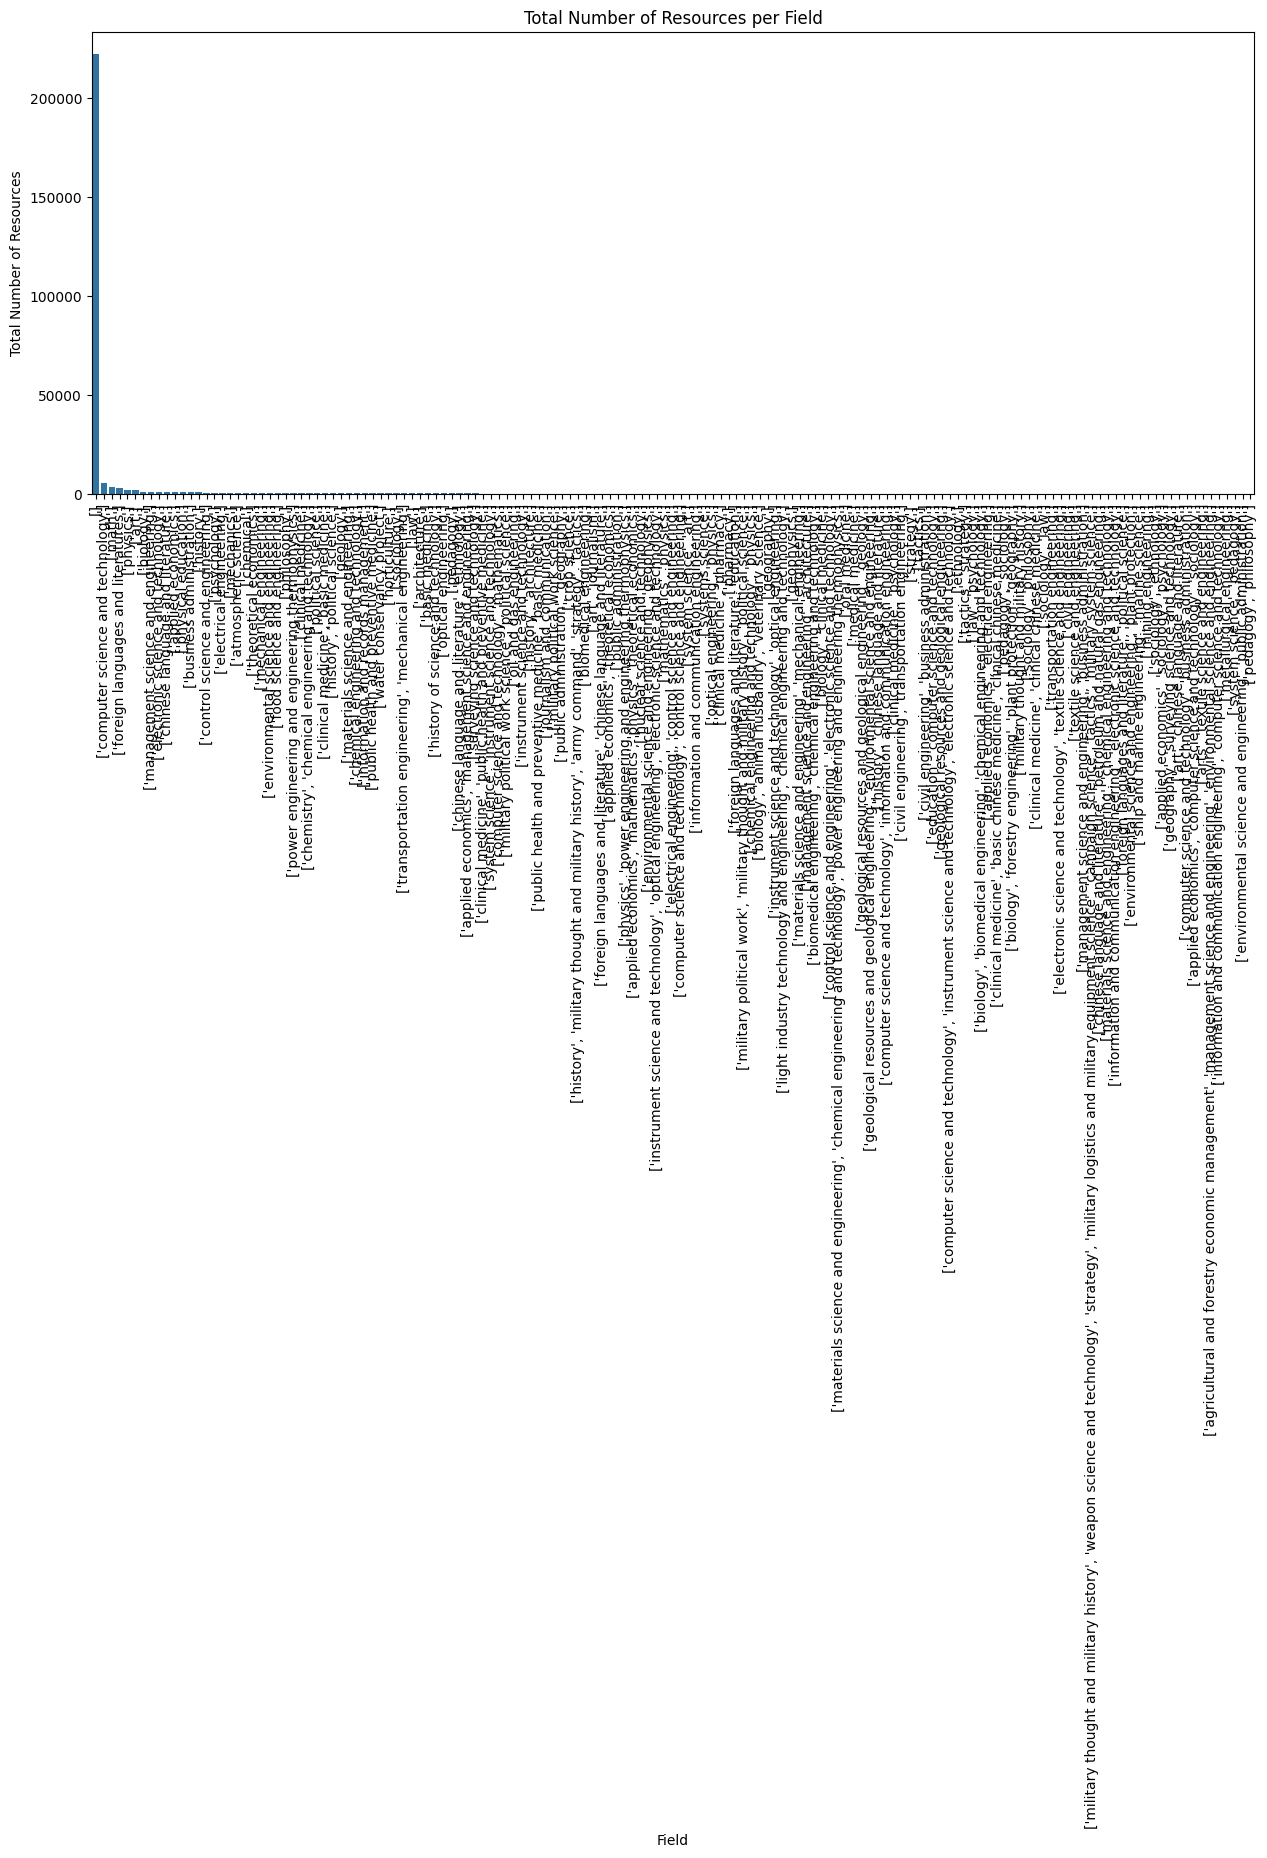

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'course_df' is your DataFrame as defined in the previous code

plt.figure(figsize=(8, 6))
sns.histplot(course_df['number of resources'], bins=30, kde=True)
plt.title('Distribution of Number of Resources per Course')
plt.xlabel('Number of Resources')
plt.ylabel('Number of Courses')
plt.show()


# Calculate the average number of resources
average_resources = course_df['number of resources'].mean()
print(f"Average number of resources per course: {average_resources}")

# Group courses by 'field' and calculate the total number of resources for each field
field_resource_counts = course_df.groupby('field')['number of resources'].sum().reset_index()

# Sort by total resource counts
field_resource_counts = field_resource_counts.sort_values(by='number of resources', ascending=False)


# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='field', y='number of resources', data=field_resource_counts)
plt.title('Total Number of Resources per Field')
plt.xlabel('Field')
plt.ylabel('Total Number of Resources')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
count_resources = course_df['number of resources'].sort_values()
count_resources

,number of resources
3115,1
3163,1
3162,1
3161,1
3160,1
...,...
827,600
1498,752
1676,1104
3558,1200


In [ ]:
count_resources.sum()

271043

In [ ]:
path = '/gdrive/MyDrive/Nhóm 1/2 Bài tập trên lớp/Bài tập thực hành 1/Translated_Data'
course_df[['id', 'number of resources']].to_csv(os.path.join(path, 'course_num_resources.csv'), index=False)

## Làm sạch dữ liệu

Xóa cột list_resource_id

In [ ]:
course_df = course_df.drop(columns=['resource'])

In [ ]:
course_df.head()

,id,name,field,prerequisites,about,number of resources
0,C_584313,"introduction to ""zi zhi tong jian""","['history', 'chinese language and literature']",,"through the teacher's guidance, students can g...",91
1,C_584329,calculus - limit theory and functions of one v...,"['applied economics', 'mathematics', 'physics'...",,this course is a basic mathematics course in s...,170
2,C_584381,photojournalism,"['art', 'journalism']",,"master basic photography skills, understand ho...",127
3,C_597208,data mining: theory and algorithms,['computer science and technology'],,the most interesting theory + the most useful ...,125
4,C_597225,university computer,[],,university computer courses will be guided by ...,165


Loại bỏ dữ liệu nhiễu

In [ ]:
import re
import pandas as pd
# Hàm loại bỏ ký tự không mong muốn
def clean_text(text):
    # Loại bỏ ký tự đặc biệt
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Giữ lại chữ cái, số và khoảng trắng
    text = text.strip()  # Loại bỏ khoảng trắng thừa ở hai đầu
    text = text.lower()  # Chuyển về viết thường
    return text

# Tiến hành xử lý cho cột 'course_name'
course_df['name'] = course_df['name'].apply(clean_text)

# Kiểm tra dữ liệu đã xử lý
course_df.head()

,id,name,field,prerequisites,about,number of resources
0,C_584313,introduction to zi zhi tong jian,"['history', 'chinese language and literature']",,"through the teacher's guidance, students can g...",91
1,C_584329,calculus limit theory and functions of one va...,"['applied economics', 'mathematics', 'physics'...",,this course is a basic mathematics course in s...,170
2,C_584381,photojournalism,"['art', 'journalism']",,"master basic photography skills, understand ho...",127
3,C_597208,data mining theory and algorithms,['computer science and technology'],,the most interesting theory + the most useful ...,125
4,C_597225,university computer,[],,university computer courses will be guided by ...,165
